In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Machine learning and NLP libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\theam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\theam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
imdb = pd.read_csv("movie.csv")

In [3]:
imdb.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
imdb

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [5]:
imdb.columns

Index(['text', 'label'], dtype='object')

In [6]:
imdb.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [8]:
imdb.duplicated().sum()

277

In [9]:
imdb.drop_duplicates(inplace = True)

In [10]:
imdb.duplicated().sum()

0

In [11]:
imdb.isnull().sum()

text     0
label    0
dtype: int64

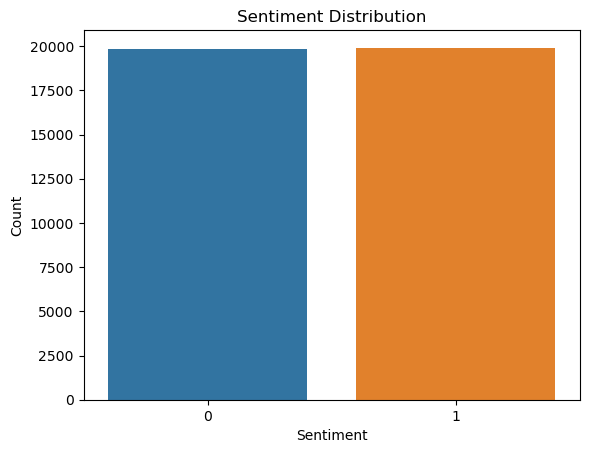

In [12]:
'''
Sentiment distribution:
Visualizing the distribution of positive and negative reviews using a bar chart or pie chart.
This will help you understand if the dataset is balanced or imbalanced.
'''

sns.countplot(x='label', data=imdb)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


In [13]:
# Calculate the percentages of each sentiment
total = len(imdb)
positive_percentage = imdb['label'].sum() / total * 100
negative_percentage = 100 - positive_percentage

print(f"Positive sentiment: {positive_percentage:.2f}%")
print(f"Negative sentiment: {negative_percentage:.2f}%")

Positive sentiment: 50.12%
Negative sentiment: 49.88%


In [14]:
imdb['text_word_count'] = [len(text.split()) for text in imdb['text']]


In [15]:
imdb.head()

,text,label,text_word_count
0,I grew up (b. 1965) watching and loving the Th...,0,151
1,"When I put this movie in my DVD player, and sa...",0,326
2,Why do people who do not know what a particula...,0,184
3,Even though I have great interest in Biblical ...,0,69
4,Im a die hard Dads Army fan and nothing will e...,1,178


In [16]:
imdb.describe()

,label,text_word_count
count,39723.000000,39723.000000
mean,0.501171,231.486142
std,0.500005,171.367657
min,0.000000,4.000000
25%,0.000000,126.000000
50%,1.000000,173.000000
75%,1.000000,282.000000
max,1.000000,2470.000000


In [17]:
#removing special characters
def remove_special_characters(text):
    # Remove HTML tags, Br was repeating a lot while ploting word cloud
    text = re.sub(r'<[^>]+>', '', text)
    # Replace all non-alphanumeric characters (\W) with a space
    text = re.sub(r'\W', ' ', text)
    return text


imdb['text'] = imdb['text'].apply(remove_special_characters)

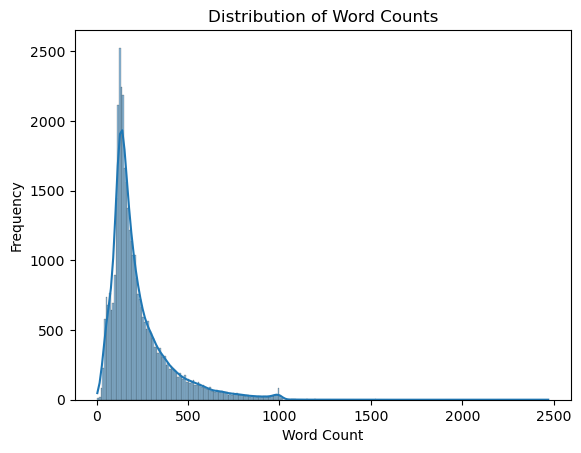

In [18]:
# Plotting the distribution of word counts
sns.histplot(data=imdb, x='text_word_count', kde=True)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.show()

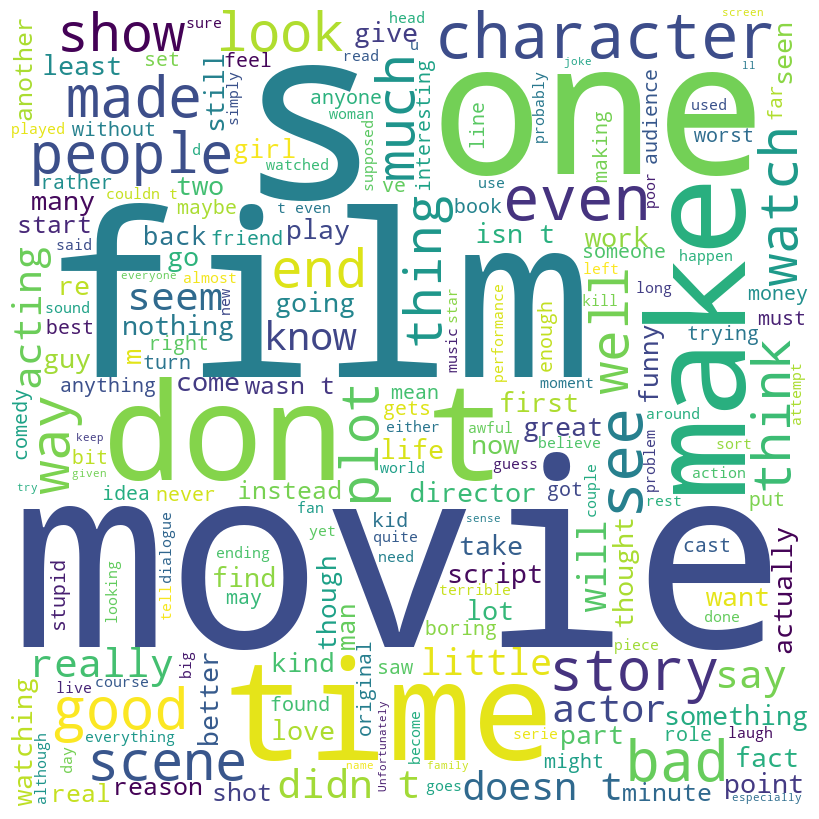

In [19]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to only include negative sentiment reviews
negative_reviews = imdb[imdb['label'] == 0]

# Combine the text from all negative sentiment reviews into a single string
negative_text = ' '.join(review for review in negative_reviews['text'])

# Generating the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      stopwords=None, min_font_size=10).generate(negative_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


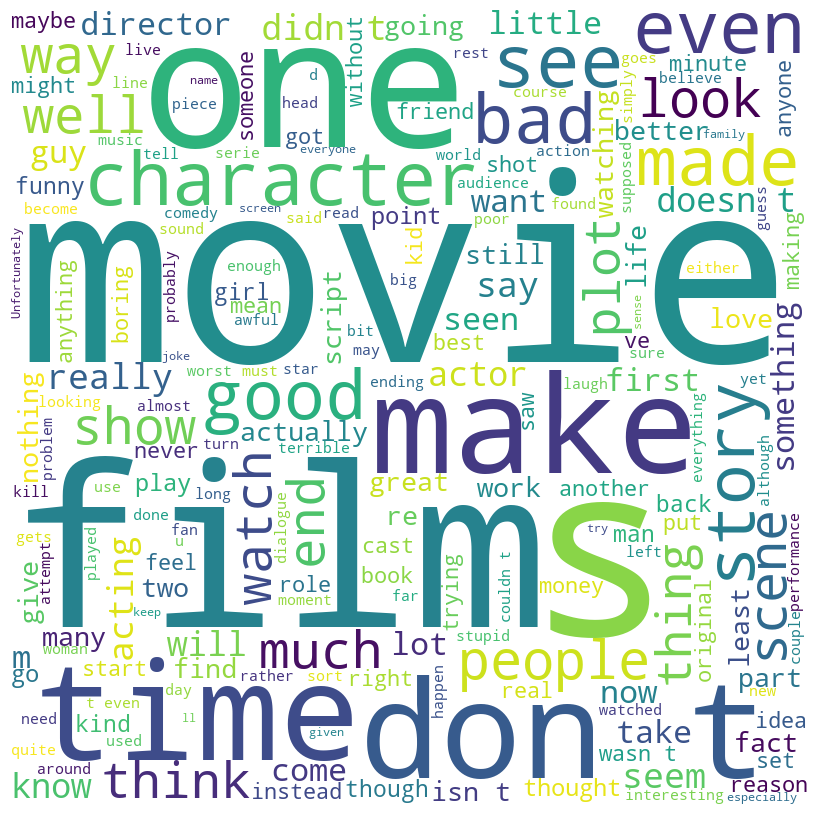

In [20]:
#Applying same method for positive sentiment
positive_reviews = imdb[imdb['label'] == 1]

# Combine the text from all negative sentiment reviews into a single string
positive_text = ' '.join(review for review in positive_reviews['text'])

# Generating the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      stopwords=None, min_font_size=10).generate(negative_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(imdb['text'], imdb['label'], test_size=0.2, random_state=42)

In [22]:
# Converting the text to a numerical vector representation using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [23]:
# Training the logistic regression model on the vectorized text data
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [24]:
# Evaluating the model on the testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(report)

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3991
           1       0.89      0.90      0.90      3954

    accuracy                           0.89      7945
   macro avg       0.90      0.89      0.89      7945
weighted avg       0.90      0.89      0.89      7945



In [25]:
# Training  Naive Bayes model on the vectorized text data
clf = MultinomialNB()
clf.fit(X_train, y_train)



MultinomialNB()

In [26]:
# Evaluating the model on the testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(report)

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3991
           1       0.88      0.85      0.86      3954

    accuracy                           0.87      7945
   macro avg       0.87      0.87      0.87      7945
weighted avg       0.87      0.87      0.87      7945



In [27]:
# Training Random Forest model on the vectorized text data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [28]:
# Evaluateing the Random Forest model on the testing data
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy:.2f}")
print(report)


Random Forest Results:
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3991
           1       0.84      0.84      0.84      3954

    accuracy                           0.84      7945
   macro avg       0.84      0.84      0.84      7945
weighted avg       0.84      0.84      0.84      7945



In [29]:
# Training an SVM model on the vectorized text data
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [30]:
# Evaluating the SVM model on the testing data
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("SVM Results:")
print(f"Accuracy: {accuracy:.2f}")
print(report)

SVM Results:
Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      3991
           1       0.89      0.90      0.90      3954

    accuracy                           0.90      7945
   macro avg       0.90      0.90      0.90      7945
weighted avg       0.90      0.90      0.90      7945



Conclusion
Based on the analysis, the SVM model has the highest accuracy of 0.90, making it the most effective model for predicting the sentiment of a given movie review as positive or negative.

In [32]:
#save each trained model as a pickle file in the current working directory.
import pickle

# Save logistic regression model
with open('logistic_regression.pkl', 'wb') as file:
    pickle.dump(clf, file)

# Save Naive Bayes model
with open('naive_bayes.pkl', 'wb') as file:
    pickle.dump(clf, file)

# Save Random Forest model
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Save SVM model
with open('svm.pkl', 'wb') as file:
    pickle.dump(svm, file)
